In [1]:
import pandas as pd
import sqlite3
import csv
import matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Tian\\Downloads\\cs_independent_study\\spend.csv")

df

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
0,50 - LIBRARY,50100 - LIB PUBLIC SERVICE,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-11355535.00,-11941627.00,-12603779.00,-13080447.90
1,50 - LIBRARY,50300 - LIB COL RES & ACCESS,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-2056164.00,-2222626.00,-2199357.00,-2268968.77
2,50 - LIBRARY,50400 - LIB FACILITIES,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-1766869.00,-1768986.00,-1963404.00,-1976738.18
3,51 - PARKS,51220 - PARK MTC FORESTRY GENERAL,Revenue,49 - TRANSFER IN,49124 - TRANSFER IN FROM OTHER RESTRIC,-1000000.00,-2500000.00,-3100342.25,0.00
4,44 - STREETS,44220 - ST RECYCLING COLLECTION,Revenue,43 - CHARGES FOR SERVICES,43445 - SALE OF RECYCLABLES,-841012.69,-866760.77,-1218608.41,-892803.25
5,65 - PLANNING,65300 - PL METROPOLITAN PLANNING ORG,Revenue,49 - TRANSFER IN,49123 - TRANSFER IN FROM GRANTS,-683795.41,-809850.95,0.00,0.00
6,20 - MUNICIPAL COURT,20100 - MUNICIPAL COURT,Revenue,43 - CHARGES FOR SERVICES,43120 - COURT FEES,-640286.53,-624340.58,-515025.37,-421899.96
7,30 - FIRE,30252 - FIRE INSPECTION ELEVATOR,Revenue,44 - LICENSES AND PERMITS,44230 - ELEVATOR PERMITS AND INSPECTS,-617670.00,-606446.50,-534775.00,-555936.50
8,40 - ENGINEERING,40470 - ENG FAC MAINT ADMIN,Expense,58 - INTER DEPART BILLING,58131 - ID BILLING TO POLICE,-531289.00,-533701.00,-536303.00,-611303.00
9,50 - LIBRARY,50300751 - LIB COL RES & ACCESS CENTRAL,Revenue,43 - CHARGES FOR SERVICES,43568 - CATALOGING SERVICES,-455858.00,-454255.00,-454255.00,-454290.00


In [3]:
## How much revenue for different Character Codes changes in Information Technology

conn = sqlite3.connect('df.db')
df.to_sql('result', conn, if_exists = 'replace', index = False)
df_revenue_re = pd.read_sql('SELECT "Character Code","2015","2016","2017","2018" from spend where agency == "17 -  INFORMATION TECHNOLOGY" and "Account Type" == "Revenue" group by "Character Code"', conn)

df_revenue_re

C:\Users\Tian\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


,Character Code,2015,2016,2017,2018
0,42 - INTERGOV REVENUES,-8233.75,-9773.75,-18120.48,-2625.0
1,43 - CHARGES FOR SERVICES,0.00,-115.00,-5294.50,-2685.0
2,48 - OTHER FINANCE SOURCE,0.00,0.00,0.00,0.0


[Text(0,0,'41 - GENERAL REVENUES'),
 Text(0,0,'41 - GENERAL REVENUES'),
 Text(0,0,'41 - GENERAL REVENUES'),
 Text(0,0,'49 - TRANSFER IN'),
 Text(0,0,'43 - CHARGES FOR SERVICES'),
 Text(0,0,'49 - TRANSFER IN'),
 Text(0,0,'43 - CHARGES FOR SERVICES'),
 Text(0,0,'44 - LICENSES AND PERMITS'),
 Text(0,0,'58 - INTER DEPART BILLING'),
 Text(0,0,'43 - CHARGES FOR SERVICES'),
 Text(0,0,'44 - LICENSES AND PERMITS')]

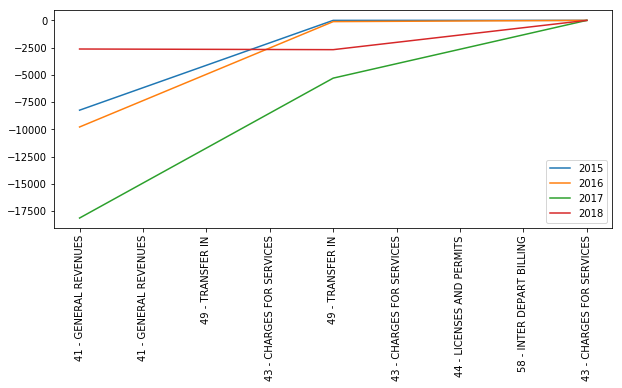

In [4]:
df_revenue_re.plot.line(figsize=(10,4))
ax = plt.gca()

ax.set_xticklabels(df["Character Code"], rotation=90)

In [5]:
## How much expending for different Character Codes changes in overall

conn = sqlite3.connect('df.db')
df.to_sql('result', conn, if_exists = 'replace', index = False)
df_object_character_code_per_year = pd.read_sql('SELECT "Character Code","2015","2016","2017","2018" from spend group by "Character Code"', conn)
df_object_character_code_per_year



C:\Users\Tian\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


,Character Code,2015,2016,2017,2018
0,41 - GENERAL REVENUES,-274766.00,-355596.0,-149024.00,-452874.92
1,42 - INTERGOV REVENUES,0.00,0.0,0.00,0.00
2,43 - CHARGES FOR SERVICES,0.00,0.0,0.00,0.00
3,44 - LICENSES AND PERMITS,481.00,0.0,0.00,0.00
4,45 - FINE FORFEITURE ASMT,13436.43,967.0,7007.24,6497.81
5,46 - INVEST OTHER CONTRIB,0.00,0.0,0.00,0.00
6,47 - MISC REVENUE,0.00,0.0,0.00,0.00
7,48 - OTHER FINANCE SOURCE,0.00,0.0,0.00,0.00
8,49 - TRANSFER IN,0.00,0.0,0.00,0.00
9,51 - SALARIES,0.00,0.0,0.00,117.72


In [7]:
# Objects Revenue distribution for Information technology in 2015

conn = sqlite3.connect('df.db')
df.to_sql('result', conn, if_exists = 'replace', index = False)
df_object_ex_2015 = pd.read_sql('SELECT object, sum("2015")from spend where "Account Type" == "Expense" and agency == "17 -  INFORMATION TECHNOLOGY" Group by object order by "2015" DESC Limit 5', conn)
df_object_ex_2015



C:\Users\Tian\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


,Object,"sum(""2015"")"
0,51110 - PERMANENT WAGES,3371015.24
1,54335 - SYSTEM AND SOFTWARE MAINTENANC,1133067.47
2,52410 - HEALTH INSURANCE BENEFIT,581843.76
3,52610 - FICA MEDICARE BENEFITS,262236.41
4,52510 - WI RETIREMENT SYSTEM,234763.22


In [8]:
# Objects Revenue distribution for Information technology in 2016

conn = sqlite3.connect('df.db')
df.to_sql('result', conn, if_exists = 'replace', index = False)
df_object_ex_2016 = pd.read_sql('SELECT object, sum("2016")from spend where "Account Type" == "Expense" and agency == "17 -  INFORMATION TECHNOLOGY" Group by object order by "2016" DESC Limit 5', conn)
df_object_ex_2016


C:\Users\Tian\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


,Object,"sum(""2016"")"
0,51110 - PERMANENT WAGES,3584299.99
1,54335 - SYSTEM AND SOFTWARE MAINTENANC,1248036.66
2,52410 - HEALTH INSURANCE BENEFIT,559151.85
3,52610 - FICA MEDICARE BENEFITS,277501.62
4,52510 - WI RETIREMENT SYSTEM,241845.57


In [9]:
# Objects Revenue distribution for Information technology in 2017

conn = sqlite3.connect('df.db')
df.to_sql('result', conn, if_exists = 'replace', index = False)
df_object_ex_2017 = pd.read_sql('SELECT object, sum("2017")from spend where "Account Type" == "Expense" and agency == "17 -  INFORMATION TECHNOLOGY" Group by object order by "2017" DESC Limit 5', conn)
df_object_ex_2017

C:\Users\Tian\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


,Object,"sum(""2017"")"
0,51110 - PERMANENT WAGES,3784648.94
1,54335 - SYSTEM AND SOFTWARE MAINTENANC,1303440.58
2,52410 - HEALTH INSURANCE BENEFIT,570878.24
3,52610 - FICA MEDICARE BENEFITS,298602.73
4,52510 - WI RETIREMENT SYSTEM,262547.29


In [10]:
# Objects Revenue distribution for Information technology in 2018
conn = sqlite3.connect('df.db')
df.to_sql('result', conn, if_exists = 'replace', index = False)
df_object_ex_2018 = pd.read_sql('SELECT object, sum("2018")from spend where "Account Type" == "Expense" and agency == "17 -  INFORMATION TECHNOLOGY" Group by object order by "2018" DESC Limit 5', conn)
df_object_ex_2018

C:\Users\Tian\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


,Object,"sum(""2018"")"
0,51110 - PERMANENT WAGES,3816949.74
1,54335 - SYSTEM AND SOFTWARE MAINTENANC,1275200.22
2,52410 - HEALTH INSURANCE BENEFIT,602736.59
3,52610 - FICA MEDICARE BENEFITS,294621.42
4,52510 - WI RETIREMENT SYSTEM,259528.74


In [12]:
bigdata = pd.concat([df_object_ex_2015, df_object_ex_2016,df_object_ex_2017,df_object_ex_2018], ignore_index=True)
conn = sqlite3.connect('df.db')
df.to_sql('result', conn, if_exists = 'replace', index = False)
df_object_ex_to = pd.read_sql('SELECT object, sum("2018"), sum("2017"), sum("2016"), sum("2015") from spend where "Account Type" == "Expense" and agency == "17 -  INFORMATION TECHNOLOGY" Group by object order by "2018" DESC Limit 5', conn)
df_object_ex_to

C:\Users\Tian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.
C:\Users\Tian\Anaconda3\lib\site-packages\pandas\core\generic.py:2127: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


,Object,"sum(""2018"")","sum(""2017"")","sum(""2016"")","sum(""2015"")"
0,51110 - PERMANENT WAGES,3816949.74,3784648.94,3584299.99,3371015.24
1,54335 - SYSTEM AND SOFTWARE MAINTENANC,1275200.22,1303440.58,1248036.66,1133067.47
2,52410 - HEALTH INSURANCE BENEFIT,602736.59,570878.24,559151.85,581843.76
3,52610 - FICA MEDICARE BENEFITS,294621.42,298602.73,277501.62,262236.41
4,52510 - WI RETIREMENT SYSTEM,259528.74,262547.29,241845.57,234763.22


[Text(0,0,'51110 - PERMANENT WAGES'),
 Text(0,0,'54335 - SYSTEM AND SOFTWARE MAINTENANC'),
 Text(0,0,'52410 - HEALTH INSURANCE BENEFIT'),
 Text(0,0,'52610 - FICA MEDICARE BENEFITS'),
 Text(0,0,'52510 - WI RETIREMENT SYSTEM')]

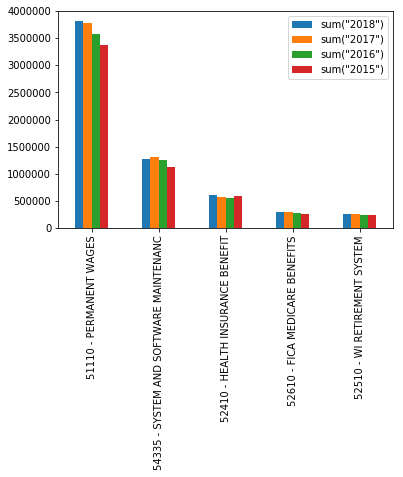

In [13]:
df_object_ex_to.plot.bar()
ax = plt.gca()
ax.set_xticklabels(df_object_ex_to["Object"], rotation=90)